In [68]:
source(file.path("..", "R", "init.R"))
init(where = "local")

suppressMessages({
  library(dplyr)
  library(ggplot2)
  library(reticulate)
  library(lhs)
  library(future.apply)
  library(future)
  library(parallel)
})

[1] "Config for local!"


# Problem

In [69]:
source("problem.R")
problem

$num_vars
[1] 17

$names
 [1] "phen_VegTherTimeResp_X3"   "phen_RepTherTimeResp_X3"  
 [3] "phen_VegPhoMod_X1"         "phen_RepPhoMod_X1"        
 [5] "phen_VegetativeTarget"     "phen_EarlyFloweringTarget"
 [7] "phen_EarlyPodDevTarget"    "phen_FractGrainFill"      
 [9] "phen_MidGrainFill"         "phen_EntGrainFill"        
[11] "phen_Maturing"             "phen_Ripening"            
[13] "leaf_RUE"                  "leaf_AreaLargLeaf"        
[15] "leaf_Phyllochron"          "leaf_ExtinctionCoef_Y1"   
[17] "grain_HarvIndex"          

$bounds
$bounds[[1]]
[1] 21 39

$bounds[[2]]
[1] 21 39

$bounds[[3]]
[1] 10.5 14.5

$bounds[[4]]
[1] 10.5 14.5

$bounds[[5]]
[1] 200 600

$bounds[[6]]
[1] 100 300

$bounds[[7]]
[1]  70 210

$bounds[[8]]
[1] 0.035 0.065

$bounds[[9]]
[1] 0.35 0.65

$bounds[[10]]
[1] 250 750

$bounds[[11]]
[1] 35 65

$bounds[[12]]
[1] 35 65

$bounds[[13]]
[1] 0.8 1.6

$bounds[[14]]
[1] 0.004 0.008

$bounds[[15]]
[1] 35 65

$bounds[[16]]
[1] 0.4 0.8

$bounds[[17]]
[1] 0.35 0.65

# Generate samples

,id,phen_VegTherTimeResp_X3,phen_RepTherTimeResp_X3,phen_VegPhoMod_X1,phen_RepPhoMod_X1,phen_VegetativeTarget,phen_EarlyFloweringTarget,phen_EarlyPodDevTarget,phen_FractGrainFill,phen_MidGrainFill,phen_EntGrainFill,phen_Maturing,phen_Ripening,leaf_RUE,leaf_AreaLargLeaf,leaf_Phyllochron,leaf_ExtinctionCoef_Y1,grain_HarvIndex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,29.98675,30.67091,12.68853,12.93366,545.5404,193.2387,205.2102,0.0456316,0.4810653,530.0509,44.08888,36.47201,1.250356,0.007185563,36.31212,0.6272871,0.4419872
2,2,28.09939,30.67091,12.68853,12.93366,545.5404,193.2387,205.2102,0.0456316,0.4810653,530.0509,44.08888,36.47201,1.250356,0.007185563,36.31212,0.6272871,0.4419872
3,3,29.98675,30.22717,12.68853,12.93366,545.5404,193.2387,205.2102,0.0456316,0.4810653,530.0509,44.08888,36.47201,1.250356,0.007185563,36.31212,0.6272871,0.4419872
4,4,29.98675,30.67091,14.19577,12.93366,545.5404,193.2387,205.2102,0.0456316,0.4810653,530.0509,44.08888,36.47201,1.250356,0.007185563,36.31212,0.6272871,0.4419872
5,5,29.98675,30.67091,12.68853,11.77126,545.5404,193.2387,205.2102,0.0456316,0.4810653,530.0509,44.08888,36.47201,1.250356,0.007185563,36.31212,0.6272871,0.4419872
6,6,29.98675,30.67091,12.68853,12.93366,388.4038,193.2387,205.2102,0.0456316,0.4810653,530.0509,44.08888,36.47201,1.250356,0.007185563,36.31212,0.6272871,0.4419872


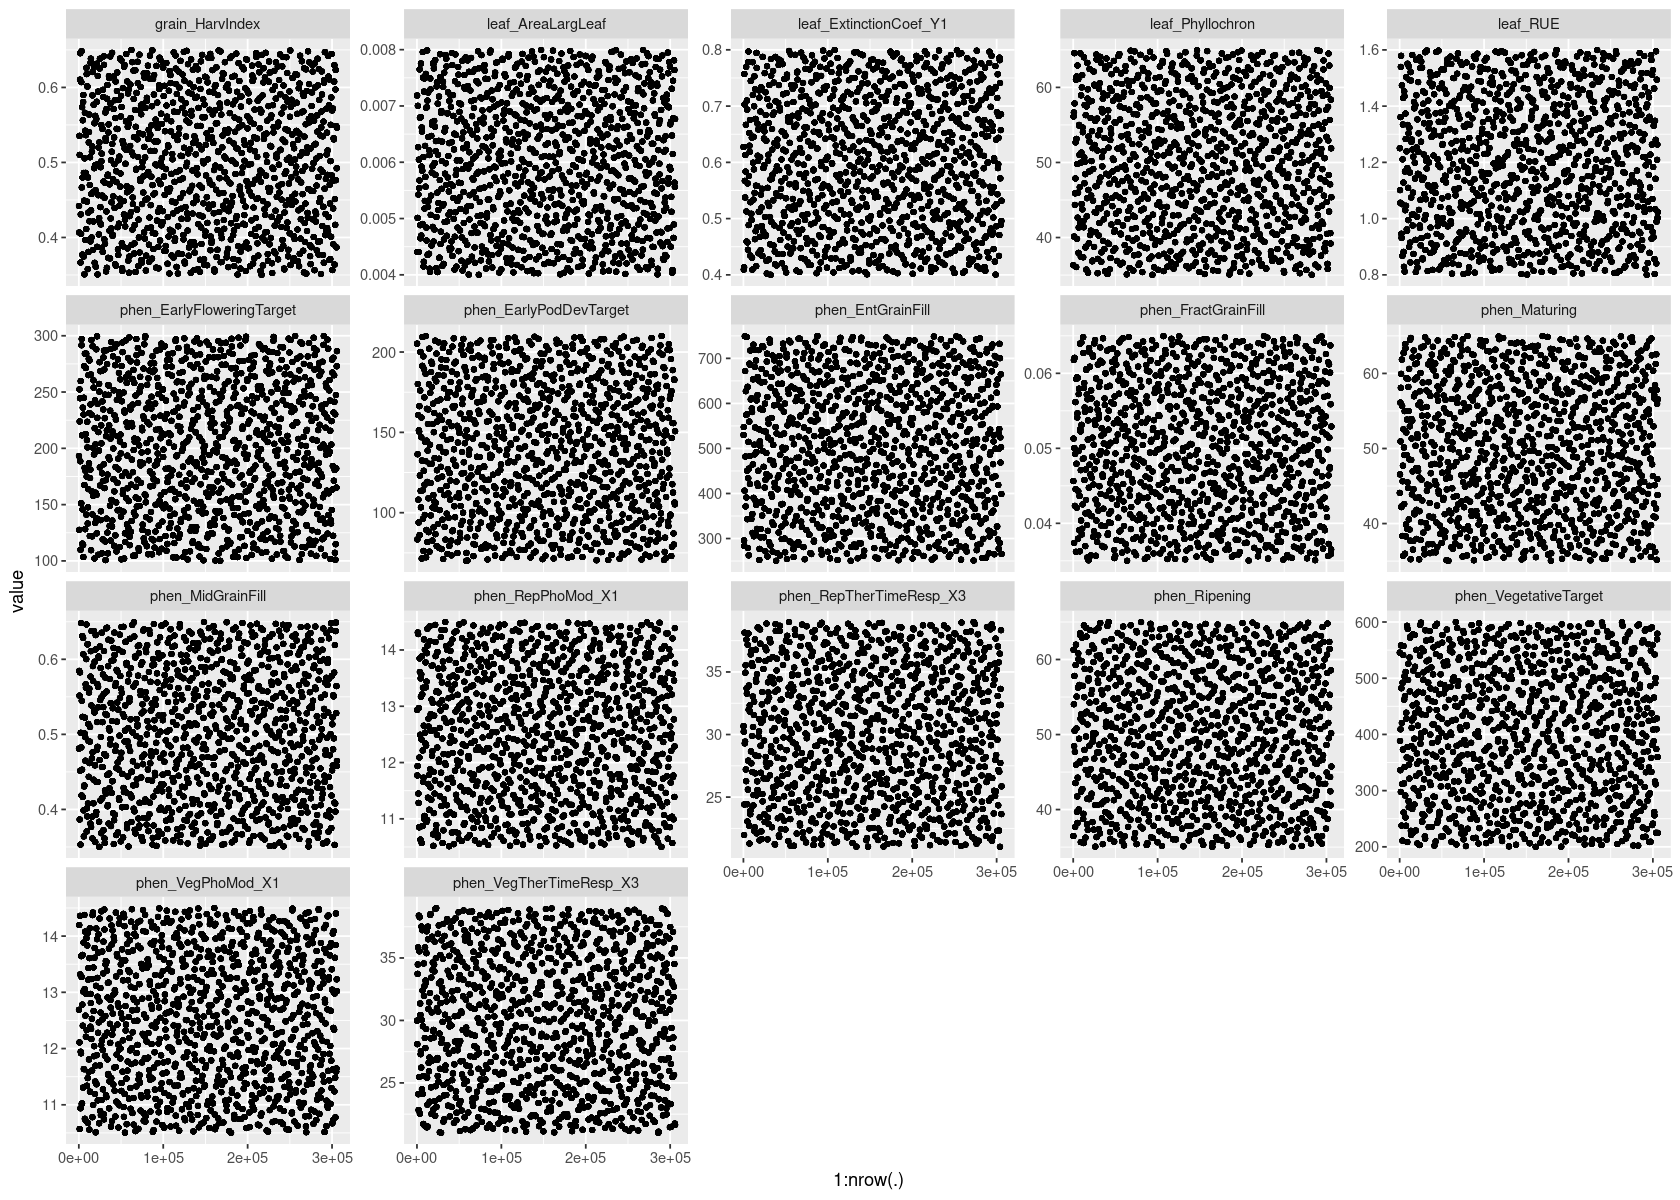

In [70]:
# method = "LHS"
# method = "FAST"
method = "SOBOL"
N_SAMPLES = 500L
samples_df <- generate_samples_csv(problem, method, N_SAMPLES)
head(samples_df)

options(repr.plot.width = 14, repr.plot.height = 10)
plot_samples_distribution(samples_df)

# Generate sensi folder

In [71]:
source(file.path("..", "R", "init.R"))
init(where = "local")

# Create sensi folder
timestamp <- format(Sys.time(), "%Y%m%d_%H%M%S")
sensi_tmp_folder <- create_tmp_dir_from_base_folder(paste0("tmp_sensi_", timestamp))
print(sensi_tmp_folder)

# Copy problem to sensi folder
saveRDS(problem, file.path(sensi_tmp_folder, "problem.rds"))

# Save samples to sensi folder
write.csv(samples_df, file.path(sensi_tmp_folder, "samples.csv"), row.names = FALSE)

[1] "Config for local!"
[1] "/home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542"


# Generate apsimx files

In [74]:
generate_apsimx_from_df(
  samples_df = samples_df,
  folder = sensi_tmp_folder,
  # sensit_base_sim_filepath = file.path(getwd(), "Soy-BR-sensit.apsimx"),
  # sensit_base_sim_filepath = file.path(BASE_SIMULATIONS_FOLDER, "Soy-BR-fields-MG6.apsimx"),
  sensit_base_sim_filepath = file.path(BASE_SIMULATIONS_FOLDER, "Soy-BR-fields-MG06BR_replac.apsimx"),
  runs_only_some = TRUE,
  N = 30,
  parallel = TRUE
)

print_stats_of_folder(sensi_tmp_folder)
apsimx_filepaths <- list_apsimx_filepaths(sensi_tmp_folder)
apsimx_filepaths[1:5]

[1] "Number of csvs: 0"
[1] "Number of apsimxs: 30"
[1] "Some files:"
[1] "    /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation1.apsimx" 
[2] "    /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation10.apsimx"
[3] "    /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation11.apsimx"
[4] "    /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation12.apsimx"
[5] "    /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation13.apsimx"


[1] "/home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation1.apsimx" 
[2] "/home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation10.apsimx"
[3] "/home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation11.apsimx"
[4] "/home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation12.apsimx"
[5] "/home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation13.apsimx"

# Run all apsimx from folder

In [73]:
source(file.path("..", "R", "init.R"))
init(where = "local")

run <- run_apsimx_from_folder(
  folder = sensi_tmp_folder,
  force_rerun = TRUE,
  runs_only_some = FALSE,
  cleanup = TRUE,
  # N = 15,
  # ids_to_run = c(1, 20, 10, 11, 16, 15),
  parallel = TRUE,
  dry_run = TRUE
)

[1] "Config for local!"


[1] "Running file /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation1.apsimx"
[1] "Running file /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation10.apsimx"
[1] "Running file /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation2.apsimx"
[1] "Running file /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation3.apsimx"
[1] "Running file /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation4.apsimx"
[1] "Running file /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation5.apsimx"
[1] "Running file /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation6.apsimx"
[1] "Running file /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/t

In [1]:


apsimx_filepath

[1] "/home/luanabeckerdaluz/git/luanabeckerdaluz/apsimx-sensitivity/tmp/tmp_sensi_20250122_085542/simulation1.apsimx"